## Paso 1

Cargamos la data del archivo ipynb para utilizarlo en la lista data, de la extraction de los features vectors.

In [1]:
import os
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Especifica la ruta a tu carpeta
folder_path = '/Users/pierre/Documents/6_ciclo/machineLearning/project3/features/r21d/r2plus1d_18_16_kinetics/'

# Lista para almacenar los datos cargados
data_list = []

for filename in os.listdir(folder_path):
    if filename.endswith('.npy'):
        file_path = os.path.join(folder_path, filename)
        data = np.load(file_path)
        data_list.append(data)


## Paso 2

Calculamos la varianza explicada para saber cuantos datos usamos, para obtener el mejor n_components.

In [4]:
#Tamaño promedio obtenido de los tamaños
scaler = StandardScaler()
total_elements = sum(data.size for data in data_list)
average_size = total_elements // len(data_list)

resized_data_list = []
for data in data_list:
    flat_data = data.flatten()
    if flat_data.size < average_size:
        padded_data = np.pad(flat_data, (0, average_size - flat_data.size), mode='constant')
    else:
        padded_data = flat_data[:average_size]
    resized_data_list.append(padded_data)

scaled_data = scaler.fit_transform(resized_data_list)
cov_matrix = np.cov(scaled_data.T)


singular_values = np.linalg.svd(scaled_data, full_matrices=False, compute_uv=False)
explained_variance_ratio = (singular_values ** 2) / np.sum(singular_values ** 2)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
optimal_n_components = np.argmax(cumulative_variance_ratio >= 0.98) + 1
print(optimal_n_components)

9


In [5]:
svd = TruncatedSVD(n_components=optimal_n_components)
svd_principal_components = svd.fit_transform(scaled_data)
svd_reconstructed_data = np.dot(svd_principal_components, svd.components_)
svd_reconstruction_error = np.linalg.norm(scaled_data - svd_reconstructed_data, 'fro')
print(svd_reconstruction_error)
print("Componentes principales obtenidos:")
print(svd_principal_components)

3.41766374918243e-13
Componentes principales obtenidos:
[[ 10.46357203 -18.08938231  44.17277948  16.64898594 -16.49308087
   71.82623214 -16.56473278   1.91084682  -5.16676741]
 [-32.90666626   2.88149994   8.94517033  -1.67648785 -44.6517408
   -4.63841049  62.35654805 -21.4001156    7.85036786]
 [ 53.55844274 -27.95618256 -38.76500744 -38.02402696  -4.73307337
    1.84871374 -14.81637594 -49.5927918   -3.14172971]
 [ 42.24372261 -20.81299348 -23.43883445 -17.23070386 -28.35705042
  -11.13461904   6.20396828  63.80596389  -2.57088303]
 [-53.16495359  23.75100528 -42.64356982   7.22645686  12.57843461
   11.45710739  -2.68831701   3.62095276 -49.22848645]
 [-35.11069545 -22.98562269  59.75177901 -30.03170159   0.71631218
  -45.15637121 -26.67767673  -1.20504585 -13.50677303]
 [ 23.45524403 -27.78632651  -4.71499138  80.25760295   8.73097939
  -31.90615797  -3.7672794   -9.37108449   1.7136669 ]
 [  3.70227415 -14.72292675   8.41741374 -16.67743069  74.47997374
   11.88885866  34.50158

In [6]:
pca = PCA(n_components=optimal_n_components)
pca_principal_components = pca.fit_transform(scaled_data)
pca_reconstructed_data = np.dot(pca_principal_components, pca.components_)
pca_reconstruction_error = np.linalg.norm(scaled_data - pca_reconstructed_data, 'fro')
print(pca_reconstruction_error)
print("Componentes principales obtenidos:")
print(pca_principal_components)

9.520456822744166e-13
Componentes principales obtenidos:
[[ 10.46357203 -18.08938231  44.17277948  16.64898594 -16.49308087
   71.82623214 -16.56473278   1.91084682  -5.16676741]
 [-32.90666626   2.88149994   8.94517033  -1.67648785 -44.6517408
   -4.63841049  62.35654805 -21.4001156    7.85036786]
 [ 53.55844274 -27.95618256 -38.76500744 -38.02402696  -4.73307337
    1.84871374 -14.81637594 -49.5927918   -3.14172971]
 [ 42.24372261 -20.81299348 -23.43883445 -17.23070386 -28.35705042
  -11.13461904   6.20396828  63.80596389  -2.57088303]
 [-53.16495359  23.75100528 -42.64356982   7.22645686  12.57843461
   11.45710739  -2.68831701   3.62095276 -49.22848645]
 [-35.11069545 -22.98562269  59.75177901 -30.03170159   0.71631218
  -45.15637121 -26.67767673  -1.20504585 -13.50677303]
 [ 23.45524403 -27.78632651  -4.71499138  80.25760295   8.73097939
  -31.90615797  -3.7672794   -9.37108449   1.7136669 ]
 [  3.70227415 -14.72292675   8.41741374 -16.67743069  74.47997374
   11.88885866  34.5015

In [7]:
fa = FactorAnalysis(n_components=optimal_n_components)
fa_principal_components = fa.fit_transform(scaled_data)
fa_reconstructed_data = np.dot(fa_principal_components, fa.components_)
fa_reconstruction_error = np.linalg.norm(scaled_data - fa_reconstructed_data, 'fro')
print(fa_reconstruction_error)
print("Componentes principales obtenidos:")
print(fa_principal_components)

4.517412704209149e-13
Componentes principales obtenidos:
[[-0.26075818 -0.5053401   1.33298074  0.5346579  -0.55285913  2.42533616
  -0.60726364  0.07110735  0.22848573]
 [ 0.82005287  0.0804968   0.26993411 -0.05383796 -1.49675629 -0.1566239
   2.28599306 -0.79635141 -0.34716039]
 [-1.3347069  -0.78097637 -1.169793   -1.22108616 -0.15865579  0.062425
  -0.54316882 -1.84547086  0.13893414]
 [-1.05273763 -0.58142617 -0.70730244 -0.55333892 -0.95054734 -0.37597955
   0.22743768  2.37437827  0.11369006]
 [ 1.32490093  0.66350167 -1.28683452  0.23206712  0.42163756  0.38686892
  -0.09855379  0.13474464  2.17699106]
 [ 0.87497853 -0.64212015  1.80310072 -0.96442429  0.02401126 -1.52478248
  -0.97800449 -0.04484275  0.59729897]
 [-0.58451804 -0.77623131 -0.14228203  2.57735585  0.29266828 -1.07736626
  -0.13810858 -0.34872131 -0.07578209]
 [-0.09226278 -0.41129571  0.25400825 -0.53557136  2.49661866  0.40144774
   1.26482929  0.35823489 -0.59040337]
 [ 1.4663307   0.29249571 -0.96021123 -0.0

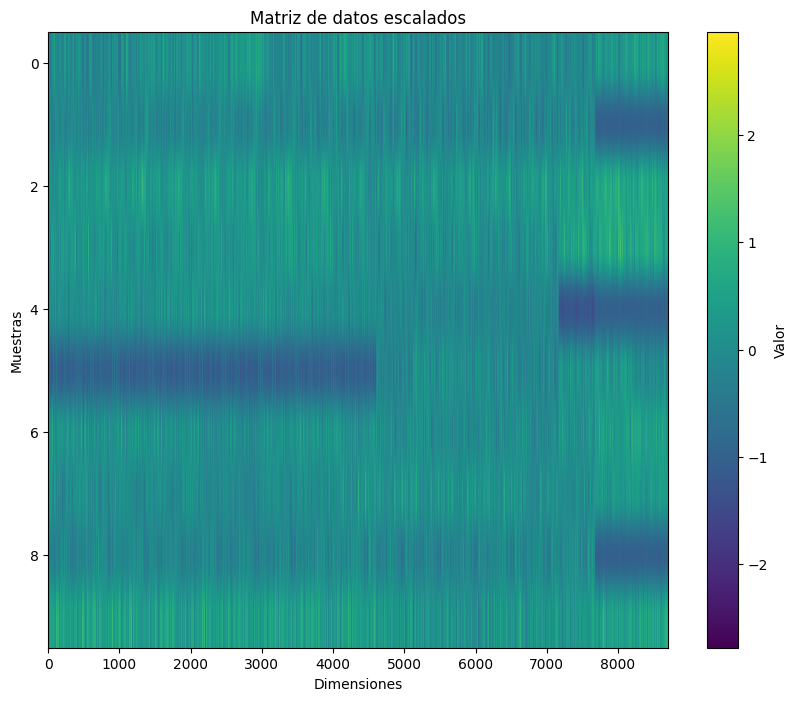

In [8]:
plt.figure(figsize=(10, 8))
plt.imshow(scaled_data, cmap='viridis', aspect='auto')
plt.colorbar(label='Valor')
plt.title('Matriz de datos escalados')
plt.xlabel('Dimensiones')
plt.ylabel('Muestras')
plt.show()

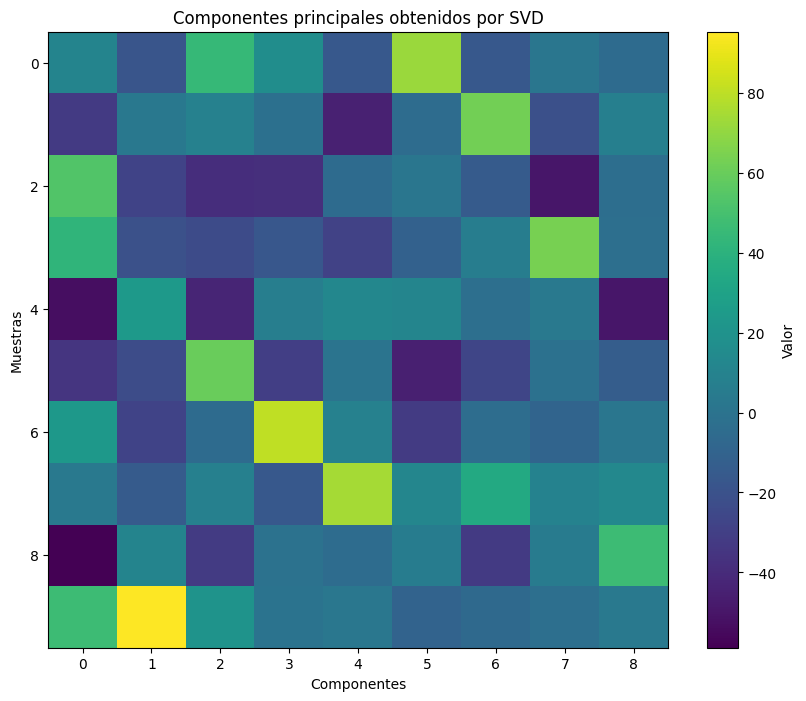

In [9]:

plt.figure(figsize=(10, 8))
plt.imshow(svd_principal_components, cmap='viridis', aspect='auto')
plt.colorbar(label='Valor')
plt.title('Componentes principales obtenidos por SVD')
plt.xlabel('Componentes')
plt.ylabel('Muestras')
plt.show()

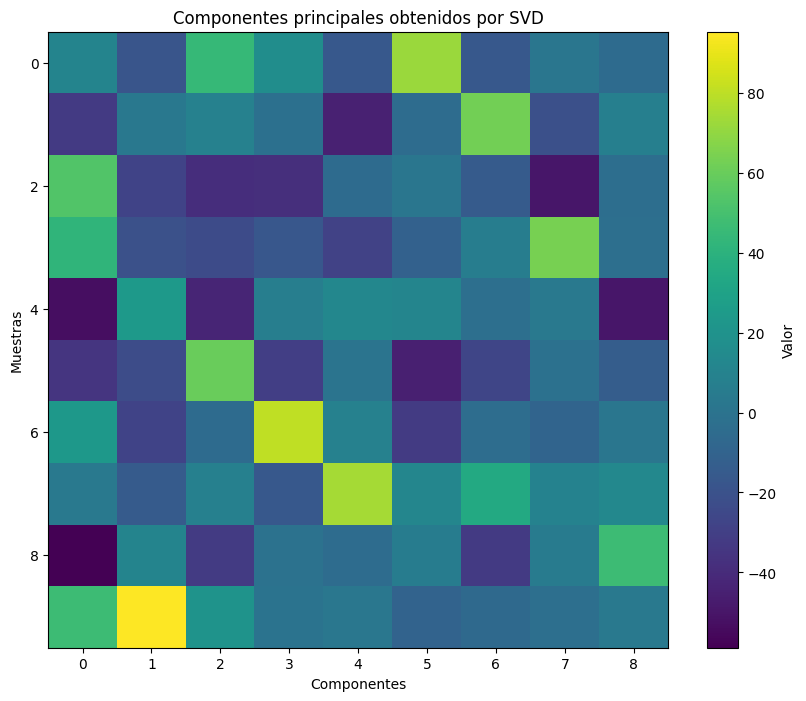

In [10]:

plt.figure(figsize=(10, 8))
plt.imshow(pca_principal_components, cmap='viridis', aspect='auto')
plt.colorbar(label='Valor')
plt.title('Componentes principales obtenidos por SVD')
plt.xlabel('Componentes')
plt.ylabel('Muestras')
plt.show()

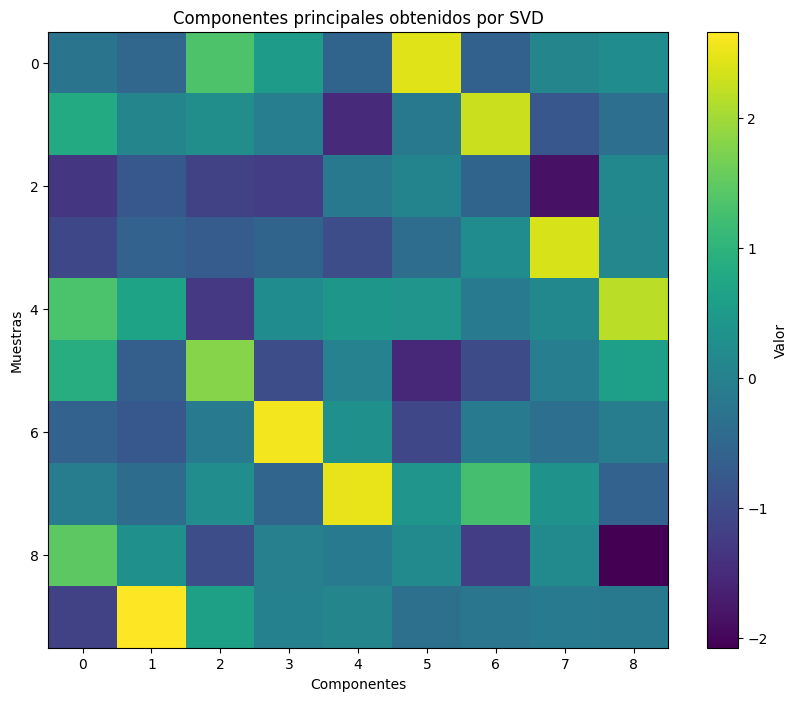

In [11]:

plt.figure(figsize=(10, 8))
plt.imshow(fa_principal_components, cmap='viridis', aspect='auto')
plt.colorbar(label='Valor')
plt.title('Componentes principales obtenidos por SVD')
plt.xlabel('Componentes')
plt.ylabel('Muestras')
plt.show()

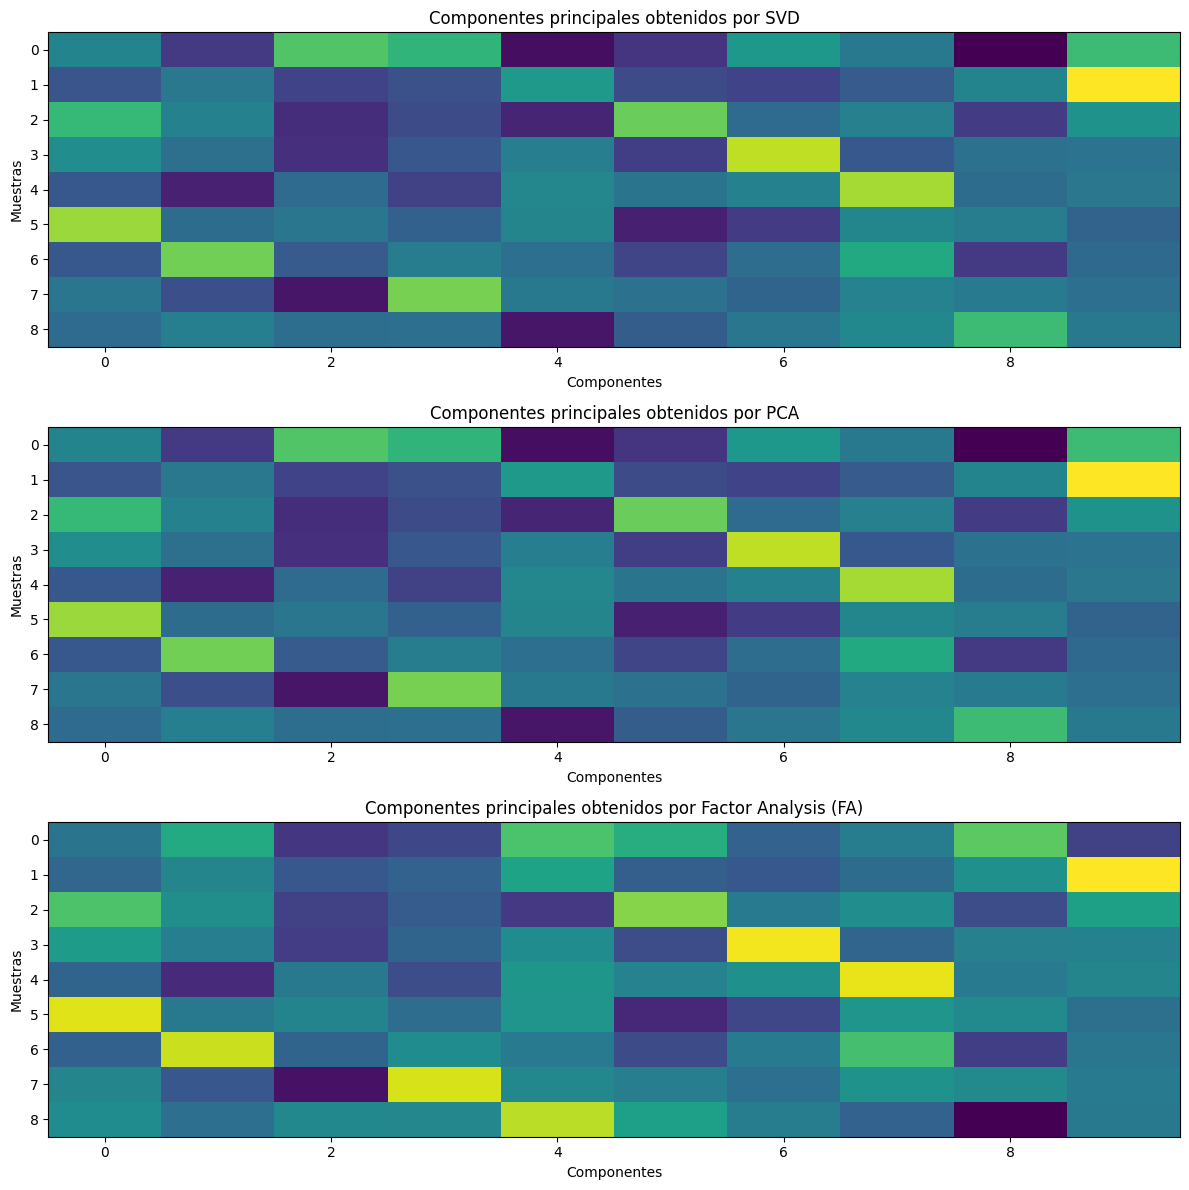

In [12]:

fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Plot para SVD
axes[0].imshow(svd_principal_components.T, cmap='viridis', aspect='auto')
axes[0].set_title('Componentes principales obtenidos por SVD')
axes[0].set_xlabel('Componentes')
axes[0].set_ylabel('Muestras')

# Plot para PCA
axes[1].imshow(pca_principal_components.T, cmap='viridis', aspect='auto')
axes[1].set_title('Componentes principales obtenidos por PCA')
axes[1].set_xlabel('Componentes')
axes[1].set_ylabel('Muestras')

# Plot para Factor Analysis (FA)
axes[2].imshow(fa_principal_components.T, cmap='viridis', aspect='auto')
axes[2].set_title('Componentes principales obtenidos por Factor Analysis (FA)')
axes[2].set_xlabel('Componentes')
axes[2].set_ylabel('Muestras')

plt.tight_layout()
plt.show()

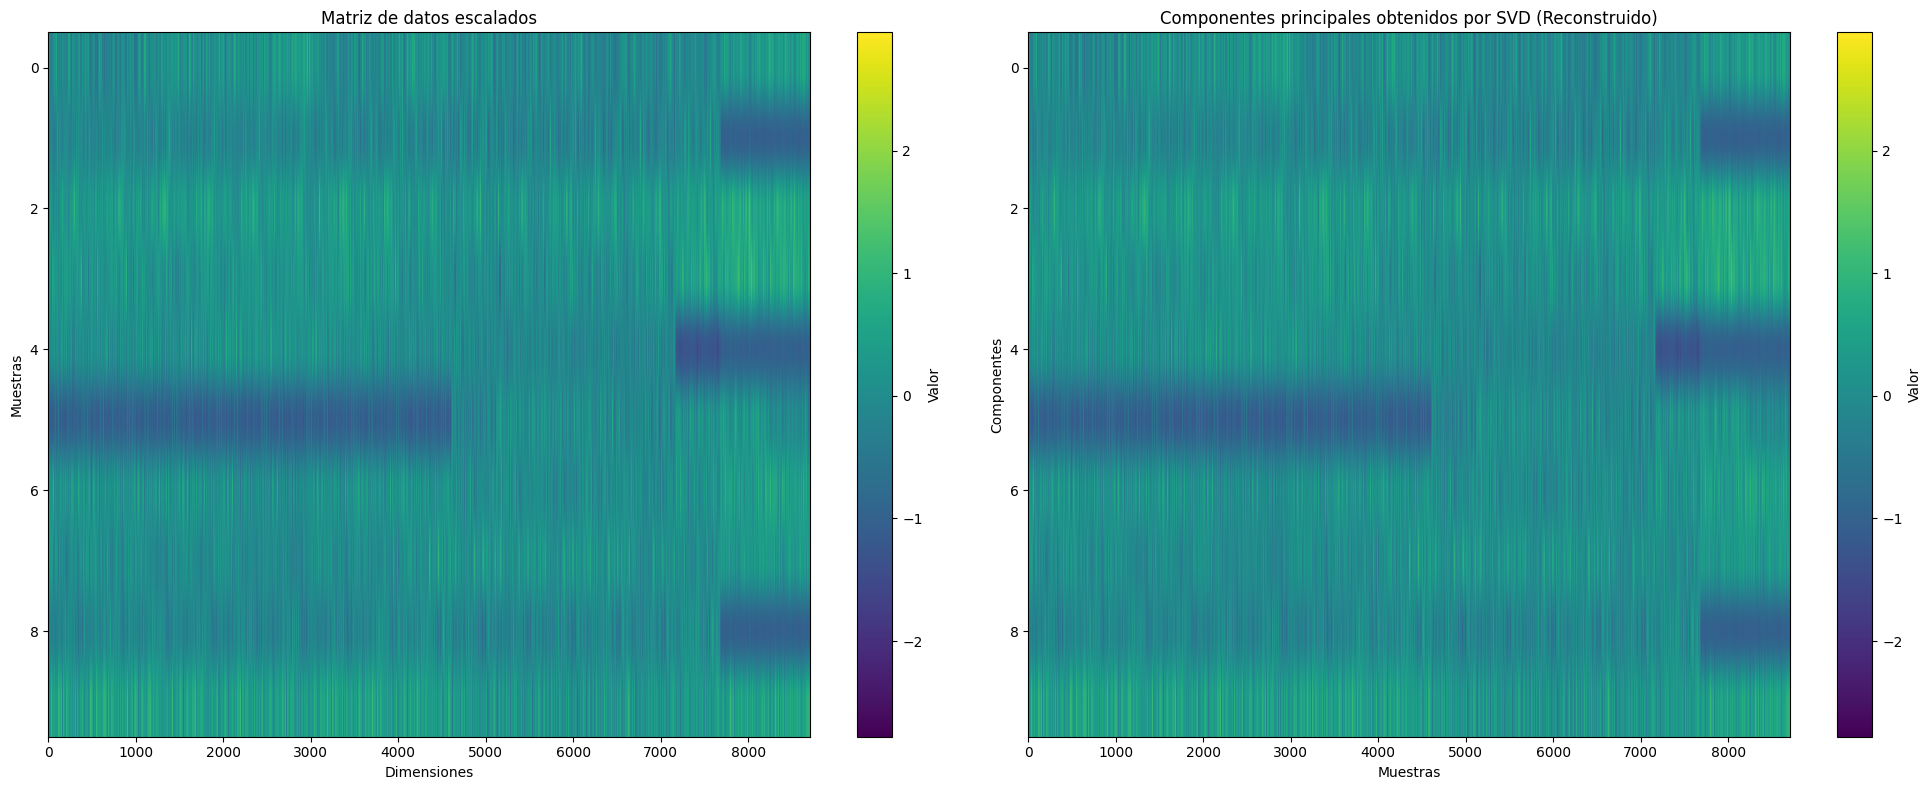

In [13]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

im1 = ax1.imshow(scaled_data, cmap='viridis', aspect='auto')
ax1.set_title('Matriz de datos escalados')
ax1.set_xlabel('Dimensiones')
ax1.set_ylabel('Muestras')
fig.colorbar(im1, ax=ax1, label='Valor')

im2 = ax2.imshow(svd_reconstructed_data, cmap='viridis', aspect='auto')
ax2.set_title('Componentes principales obtenidos por SVD (Reconstruido)')
ax2.set_xlabel('Muestras')
ax2.set_ylabel('Componentes')
fig.colorbar(im2, ax=ax2, label='Valor')

plt.tight_layout()

plt.show()

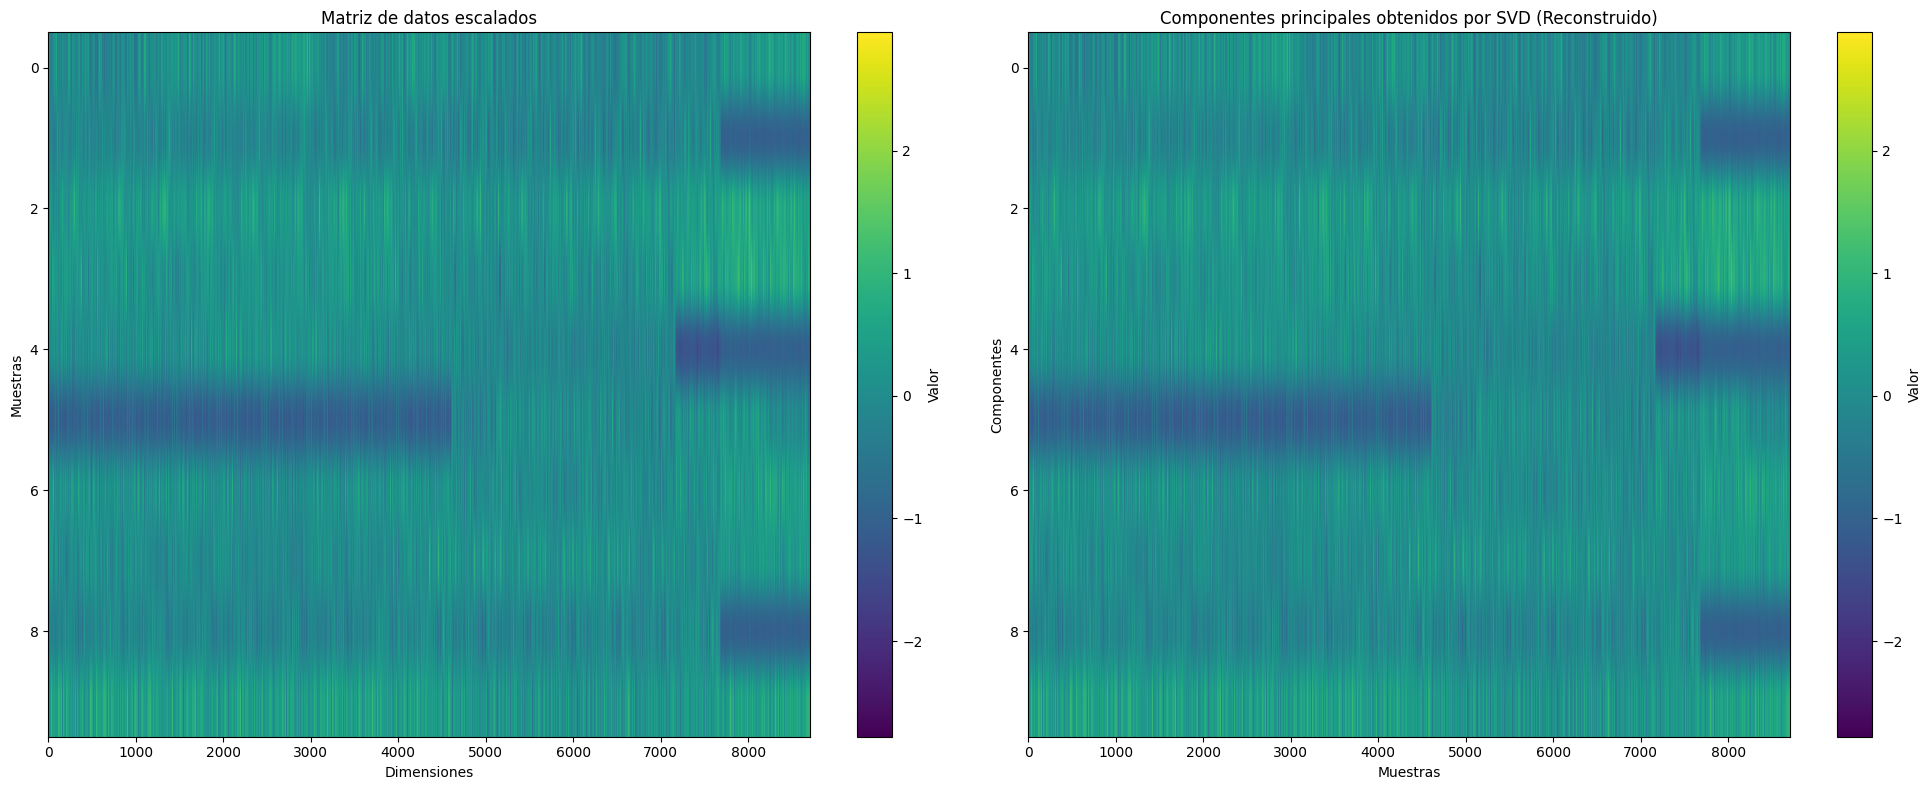

In [14]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

im1 = ax1.imshow(scaled_data, cmap='viridis', aspect='auto')
ax1.set_title('Matriz de datos escalados')
ax1.set_xlabel('Dimensiones')
ax1.set_ylabel('Muestras')
fig.colorbar(im1, ax=ax1, label='Valor')

im2 = ax2.imshow(pca_reconstructed_data, cmap='viridis', aspect='auto')
ax2.set_title('Componentes principales obtenidos por SVD (Reconstruido)')
ax2.set_xlabel('Muestras')
ax2.set_ylabel('Componentes')
fig.colorbar(im2, ax=ax2, label='Valor')

plt.tight_layout()

plt.show()

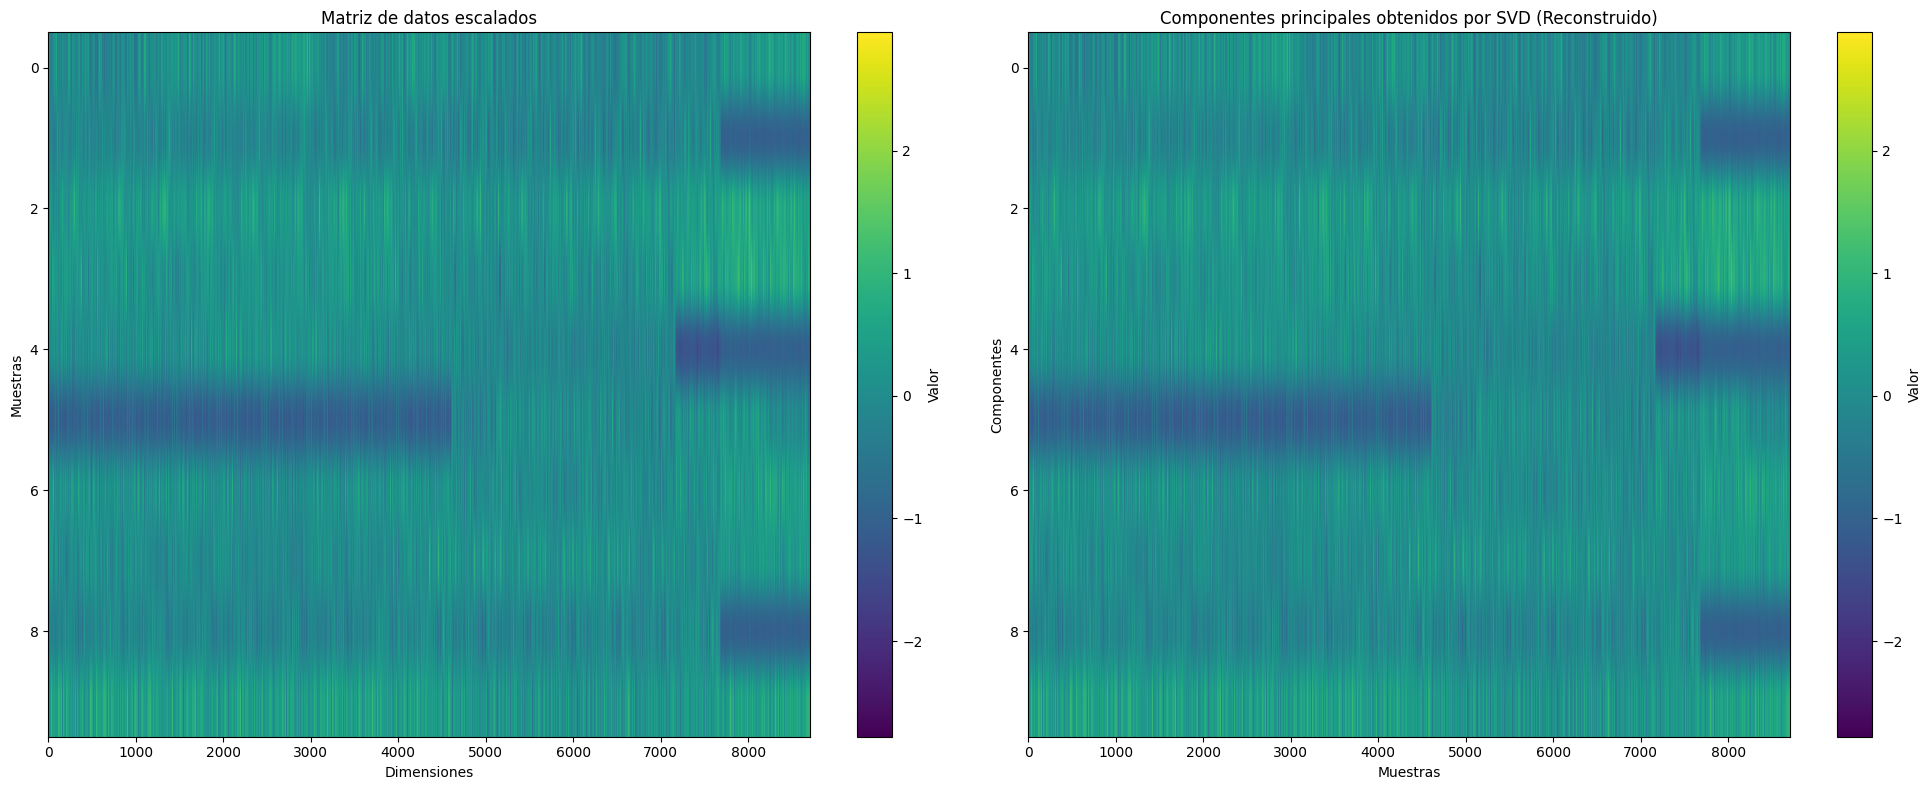

In [15]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

im1 = ax1.imshow(scaled_data, cmap='viridis', aspect='auto')
ax1.set_title('Matriz de datos escalados')
ax1.set_xlabel('Dimensiones')
ax1.set_ylabel('Muestras')
fig.colorbar(im1, ax=ax1, label='Valor')

im2 = ax2.imshow(fa_reconstructed_data, cmap='viridis', aspect='auto')
ax2.set_title('Componentes principales obtenidos por SVD (Reconstruido)')
ax2.set_xlabel('Muestras')
ax2.set_ylabel('Componentes')
fig.colorbar(im2, ax=ax2, label='Valor')

plt.tight_layout()

plt.show()